In [18]:
from Phase_4_functions import roll_mean_std
from Phase_4_functions import decompose
from Phase_4_functions import DickeyFullerTest
from Phase_4_functions import naive_model
from Phase_4_functions import sarimax_search
from Phase_4_functions import fbprophet_func
from Phase_4_functions import LSTM_func


import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
df = pd.read_csv('data/new_zillow_data.csv')

In [3]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 
                                  'Metro', 'CountyName', 'RegionType', 'StateName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [4]:
melted = melt_data(df)
melted['time'] = pd.to_datetime(melted['time'])
melted.set_index('time', inplace=True)

## Zip Code 30314 (Atlanta, GA)

### Plot the Rolling Mean and Rolling Std.

In [5]:
Atlanta = melted[melted.RegionName == 30314]
Atlanta = Atlanta.resample('MS').mean()
Atlanta = Atlanta.drop(['RegionName', 'RegionID', 'SizeRank'], axis=1)

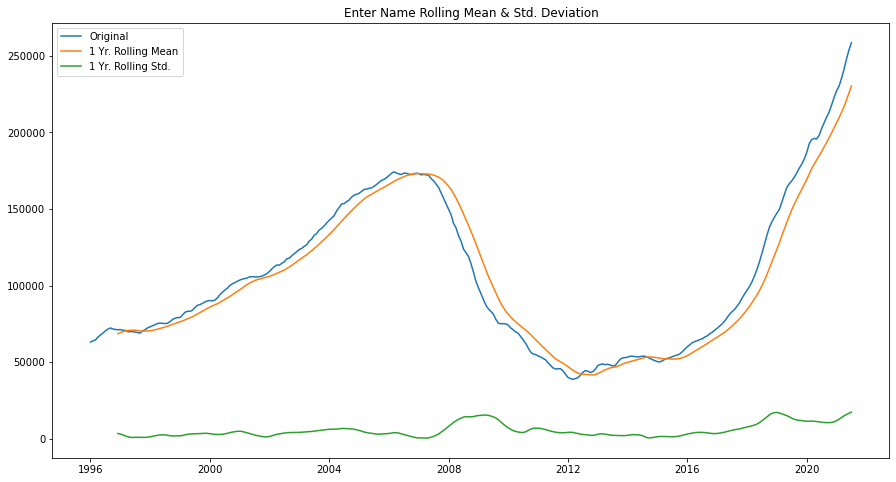

In [6]:
roll_mean_std(Atlanta)

### Seasonal Decompose

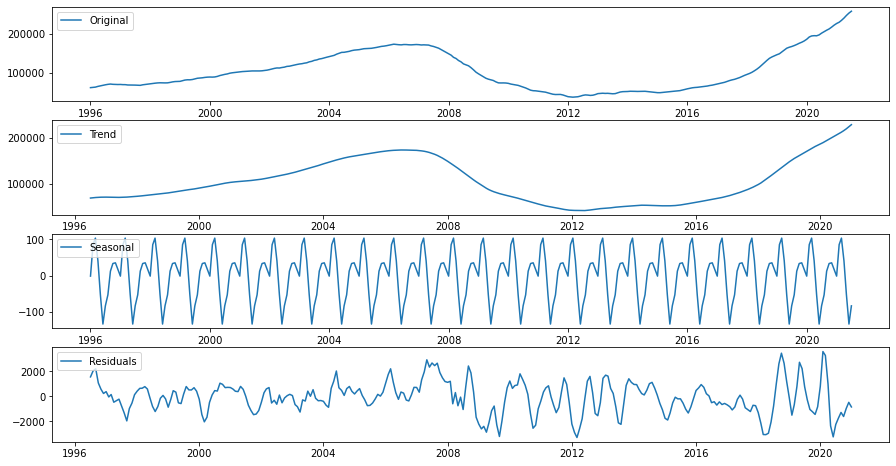

In [7]:
decompose(Atlanta)

### Differencing and DickeyFuller Test

In [8]:
DickeyFullerTest(Atlanta)

Test Statistic                  -2.531988
p-value                          0.107884
# Lags Used                     16.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64

Test Statistic                  -0.839051
p-value                          0.807381
# Lags Used                     16.000000
Number of Observations Used    289.000000
Critical Value (1%)             -3.453182
Critical Value (5%)             -2.871593
Critical Value (10%)            -2.572127
dtype: float64

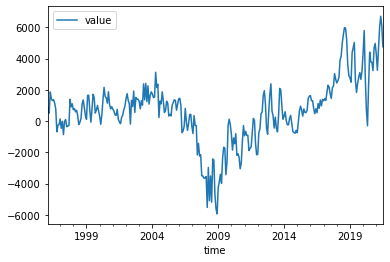

In [9]:
Atlanta_diff = Atlanta.diff().dropna()
Atlanta_diff.plot()
DickeyFullerTest(Atlanta_diff)

Test Statistic                  -3.510769
p-value                          0.007715
# Lags Used                     16.000000
Number of Observations Used    288.000000
Critical Value (1%)             -3.453262
Critical Value (5%)             -2.871628
Critical Value (10%)            -2.572146
dtype: float64

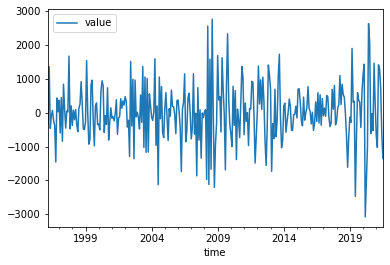

In [10]:
Atlanta_diff2 = Atlanta_diff.diff().dropna()
Atlanta_diff2.plot()
DickeyFullerTest(Atlanta_diff2)

### ACF and PACF

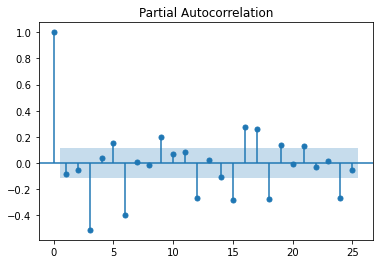

In [22]:
plot_pacf(Atlanta_diff2);

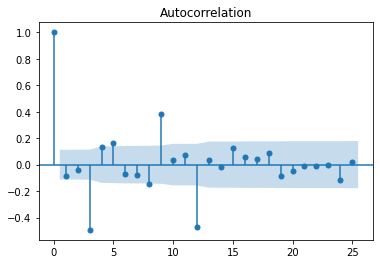

In [23]:
plot_acf(Atlanta_diff2);

### Train Test Split

In [11]:
cutoff = round(Atlanta.shape[0]*.8)
train = Atlanta[:cutoff]
test = Atlanta[cutoff:]

### Naive Model

The Naive Model RMSE for the train data is: 1640.89
The Naive Model RMSE for the test data is: 3599.89


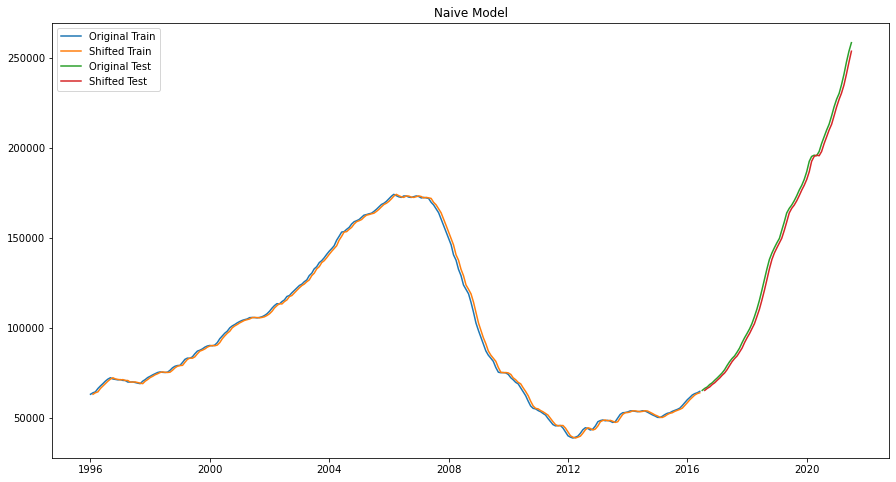

In [12]:
naive_model(train, test)

### SARIMAX GridSearch and Model

In [24]:
sarimax_search(train, p=range(0,3), d=range(0,3), q=range(0,3), maxiter=100)

THERE ARE 729 ITERATIONS
Would you like to run the models? (y or n)?n
OK, SARIMAX models will not be run.


### Facebook Prophet Model

In [14]:
Atlanta_proph = Atlanta.reset_index()
Atlanta_proph = Atlanta_proph.rename(columns={'time':'ds', 'value':'y'})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NameError: name 'original' is not defined

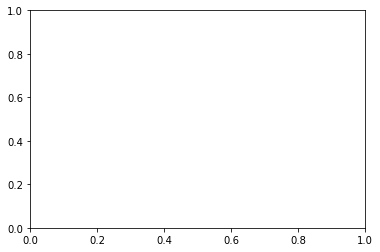

In [15]:
fbprophet_func(Atlanta_proph)

### LSTM Model

In [17]:
LSTM_func(Atlanta_proph)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 64)             16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 32)             12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
48/48 [==============================] - 1s 18ms/step - loss: 0.8081 - val_loss: 2.7657
Epoch 2/5
48/48 [===